Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1858 - mae: 0.9891 - val_loss: 0.4932 - val_mae: 0.4995
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4346 - mae: 0.4732 - val_loss: 0.4455 - val_mae: 0.4563
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3990 - mae: 0.4477 - val_loss: 0.4087 - val_mae: 0.4417
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4315 - mae: 0.4292 - val_loss: 0.3918 - val_mae: 0.4408
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3803 - mae: 0.4230 - val_loss: 0.3977 - val_mae: 0.4277
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3560 - mae: 0.4151 - val_loss: 0.3602 - val_mae: 0.4186
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3214 - mae: 0.4014 - val_loss: 0.3530 - val_mae: 0.4227
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3167 - mae: 0.3949 - val_loss: 0.3455 - val_mae: 0.4063
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3116 

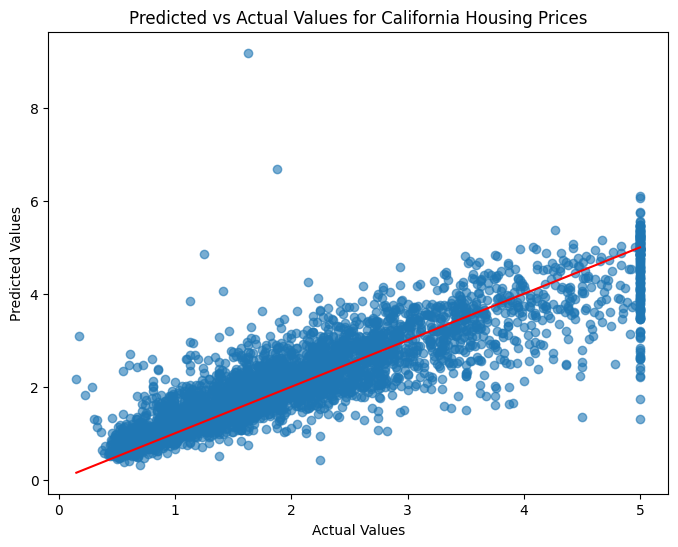

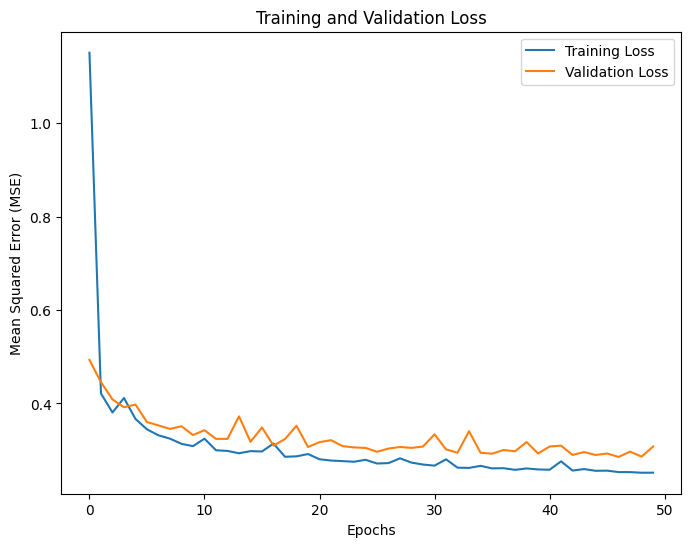

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the California Housing Prices dataset
data = fetch_california_housing()
X = data.data # Features
y = data.target # Target variable (median house values)

scaler = StandardScaler()

# Assuming X is your feature data (2D array or DataFrame)
X = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build the Feedforward Neural Network model
model = tf.keras.Sequential([tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(1)])

# Step 4: Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=1)

# Step 6: Evaluate the model on the test set
y_pred = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE) on test set: {mse}")
print(f"R-squared (R²) on test set: {r2}")

# Step 7: Plot predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values for California Housing Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red') # Line y=x for reference
plt.show()


# Step 8: Plot training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the California Housing Prices dataset
data = fetch_california_housing()
X = data.data  # Features
y = data.target  # Target variable (median house values)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build a more complex Feedforward Neural Network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Increased number of neurons
    tf.keras.layers.Dropout(0.3),  # Dropout for regularization
    tf.keras.layers.Dense(64, activation='relu'),  # Second hidden layer
    tf.keras.layers.Dropout(0.3),  # Dropout for regularization
    tf.keras.layers.Dense(32, activation='relu'),  # Third hidden layer
    tf.keras.layers.Dense(1)  # Output layer
])

# Step 3: Compile the model with Adam optimizer and Mean Squared Error loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Step 4: Use EarlyStopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 5: Train the model with the additional EarlyStopping callback
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, batch_size=32, verbose=1, callbacks=[early_stopping])

# Step 6: Evaluate the model on the test set
y_pred = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE) on test set: {mse}")
print(f"R-squared (R²) on test set: {r2}")

# Step 7: Plot predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values for California Housing Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Line y=x for reference
plt.show()

# Step 8: Plot training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 1.4510 - mae: 0.8527 - val_loss: 0.5210 - val_mae: 0.4920
Epoch 2/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5308 - mae: 0.5232 - val_loss: 0.4229 - val_mae: 0.4523
Epoch 3/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4645 - mae: 0.4865 - val_loss: 0.4194 - val_mae: 0.4570
Epoch 4/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4236 - mae: 0.4639 - val_loss: 0.3981 - val_mae: 0.4340
Epoch 5/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4136 - mae: 0.4588 - val_loss: 0.4032 - val_mae: 0.4434
Epoch 6/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3849 - mae: 0.4443 - val_loss: 0.3752 - val_mae: 0.4247
Epoch 7/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3899 - mae: 0.4413 - val_loss: 0.3701 - val_mae: 0.4145
Epoch 8/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3722 - mae: 0.4354 - val_loss: 0.3928 - val_mae: 0.4246
Epoch 9/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms

KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the California Housing Prices dataset
data = fetch_california_housing()
X = data.data  # Features
y = data.target  # Target variable (median house values)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build a more complex Feedforward Neural Network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Increased number of neurons
    tf.keras.layers.Dropout(0.3),  # Dropout for regularization
    tf.keras.layers.Dense(64, activation='relu'),  # Second hidden layer
    tf.keras.layers.Dropout(0.3),  # Dropout for regularization
    tf.keras.layers.Dense(32, activation='relu'),  # Third hidden layer
    tf.keras.layers.Dense(1)  # Output layer
])

# Step 3: Compile the model with Adam optimizer and Mean Squared Error loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Step 4: Use EarlyStopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 5: Train the model with the additional EarlyStopping callback
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, batch_size=32, verbose=1, callbacks=[early_stopping])

# Step 6: Evaluate the model on the test set
y_pred = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Show R-squared as "Accuracy" (percentage)
accuracy_percentage = r2 * 100  # Convert R² to percentage

print(f"Mean Squared Error (MSE) on test set: {mse}")
print(f"R-squared (R²) on test set: {r2}")
print(f"Model 'Accuracy' (R² as percentage): {accuracy_percentage:.2f}%")

# Step 7: Plot predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values for California Housing Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Line y=x for reference
plt.show()

# Step 8: Plot training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5815 - mae: 0.8821 - val_loss: 0.4754 - val_mae: 0.4870
Epoch 2/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5229 - mae: 0.5131 - val_loss: 0.4383 - val_mae: 0.4569
Epoch 3/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4845 - mae: 0.4965 - val_loss: 0.4307 - val_mae: 0.4535
Epoch 4/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4405 - mae: 0.4692 - val_loss: 0.4140 - val_mae: 0.4418
Epoch 5/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4221 - mae: 0.4661 - val_loss: 0.4317 - val_mae: 0.4442
Epoch 6/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3966 - mae: 0.4509 - val_loss: 0.4118 - val_mae: 0.4414
Epoch 7/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3829 - mae: 0.4420 - val_loss: 0.3638 - val_mae: 0.4292
Epoch 8/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3814 - mae: 0.4404 - val_loss: 0.3578 - val_mae: 0.4172
Epoch 9/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss:

KeyboardInterrupt: 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.6067 - mae: 0.8680 - val_loss: 0.4538 - val_mae: 0.4901
Epoch 2/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5359 - mae: 0.5277 - val_loss: 0.4963 - val_mae: 0.4762
Epoch 3/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4632 - mae: 0.4947 - val_loss: 0.4128 - val_mae: 0.4421
Epoch 4/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4397 - mae: 0.4732 - val_loss: 0.4031 - val_mae: 0.4346
Epoch 5/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4058 - mae: 0.4532 - val_loss: 0.4017 - val_mae: 0.4362
Epoch 6/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4000 - mae: 0.4453 - val_loss: 0.3822 - val_mae: 0.4286
Epoch 7/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3994 - mae: 0.4477 - val_loss: 0.3646 - val_mae: 0.4224
Epoch 8/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3791 - mae: 0.4372 - val_loss: 0.3840 - val_mae: 0.4298
Epoch 9/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

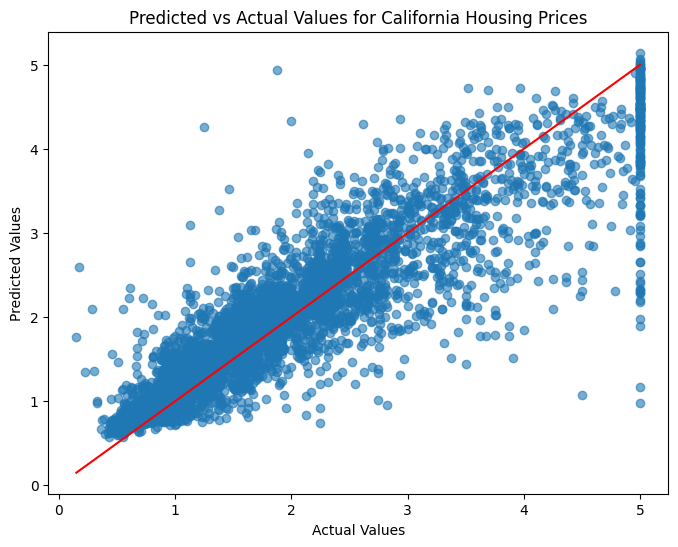

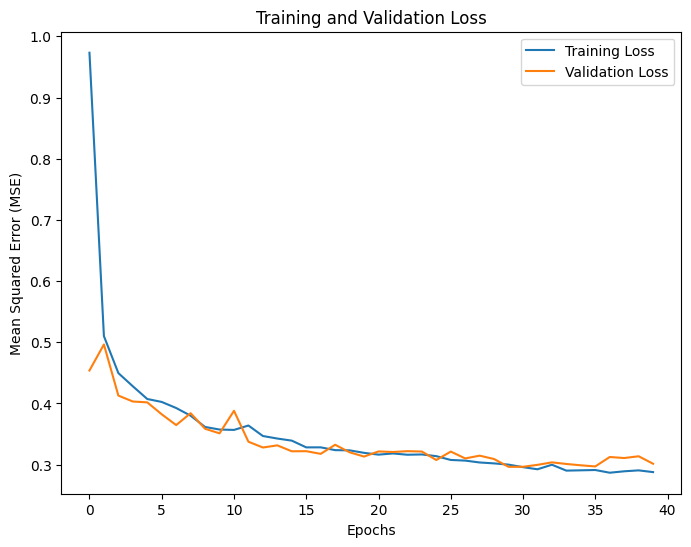

Model 'Accuracy' (R² as percentage): 78.56%


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the California Housing Prices dataset
data = fetch_california_housing()
X = data.data  # Features
y = data.target  # Target variable (median house values)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build a more complex Feedforward Neural Network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Increased number of neurons
    tf.keras.layers.Dropout(0.3),  # Dropout for regularization
    tf.keras.layers.Dense(64, activation='relu'),  # Second hidden layer
    tf.keras.layers.Dropout(0.3),  # Dropout for regularization
    tf.keras.layers.Dense(32, activation='relu'),  # Third hidden layer
    tf.keras.layers.Dense(1)  # Output layer
])

# Step 3: Compile the model with Adam optimizer and Mean Squared Error loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Step 4: Use EarlyStopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 5: Train the model with the additional EarlyStopping callback
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, batch_size=32, verbose=1, callbacks=[early_stopping])

# Step 6: Evaluate the model on the test set
y_pred = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Show R-squared as "Accuracy" (percentage)
accuracy_percentage = r2 * 100  # Convert R² to percentage

print(f"Mean Squared Error (MSE) on test set: {mse}")
print(f"R-squared (R²) on test set: {r2}")
print(f"Model 'Accuracy' (R² as percentage): {accuracy_percentage:.2f}%")

# Step 7: Plot predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values for California Housing Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Line y=x for reference
plt.show()

# Step 8: Plot training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()
r2 = r2_score(y_test, y_pred)
accuracy_percentage = r2 * 100  # Convert R² to percentage
print(f"Model 'Accuracy' (R² as percentage): {accuracy_percentage:.2f}%")



In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the California Housing Prices dataset
data = fetch_california_housing()
X = data.data  # Features
y = data.target  # Target variable (median house values)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build a more complex Feedforward Neural Network model with more layers and L2 regularization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.001)),  # Increased number of neurons and L2 regularization
    tf.keras.layers.Dropout(0.4),  # Increased dropout for regularization
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),  # Increased dropout for regularization
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(1)  # Output layer
])

# Step 3: Compile the model with a different learning rate and Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])

# Step 4: Use EarlyStopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Step 5: Train the model with the additional EarlyStopping callback
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2, batch_size=64, verbose=1, callbacks=[early_stopping])

# Step 6: Evaluate the model on the test set
y_pred = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Show R-squared as "Accuracy" (percentage)
accuracy_percentage = r2 * 100  # Convert R² to percentage

print(f"Mean Squared Error (MSE) on test set: {mse}")
print(f"R-squared (R²) on test set: {r2}")
print(f"Model 'Accuracy' (R² as percentage): {accuracy_percentage:.2f}%")

# Step 7: Plot predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values for California Housing Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Line y=x for reference
plt.show()

# Step 8: Plot training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

# Final R² as percentage
accuracy_percentage = r2 * 100
print(f"Model 'Accuracy' (R² as percentage): {accuracy_percentage:.2f}%")


Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.6619 - mae: 1.0821 - val_loss: 0.8460 - val_mae: 0.5378
Epoch 2/500
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.9286 - mae: 0.5916 - val_loss: 0.7155 - val_mae: 0.4909
Epoch 3/500
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.7925 - mae: 0.5385 - val_loss: 0.6881 - val_mae: 0.4710
Epoch 4/500
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.7071 - mae: 0.5000 - val_loss: 0.6368 - val_mae: 0.4582
Epoch 5/500
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6884 - mae: 0.4885 - val_loss: 0.6195 - val_mae: 0.4594
Epoch 6/500
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6672 - mae: 0.4921 - val_loss: 0.6119 - val_mae: 0.4461
Epoch 7/500
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6189 - mae: 0.4709 - val_loss: 0.5783 - val_mae: 0.4409
Epoch 8/500
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6161 - mae: 0.4715 - val_loss: 0.5702 - val_mae: 0.4392
Epoch 9/500
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss

KeyboardInterrupt: 